- Title: Creating WordClouds
- Date: 2021-02-04 21:00:00 -0700
- Category: Tutorial
- Summary: Using python to turn paragraph text into word clouds

Text analysis is hard, but one simple visual tool for extracting insights from dense text are word clouds. Word clouds help identify patterns in the preponderance of certain words in a body of text or within many bodies of text. The more frequently a word appears, the larger the word appears in the word cloud.

But manually stripping words from paragraphs of text one by one is time consuming and mind-numbing. In the immortal words of [Raymond Hettinger](https://www.youtube.com/watch?v=UANN2Eu6ZnM&feature=youtu.be): *"There must be a better way!"*

## Generating Some Text
To start, let's create a bunch of text to generate a word cloud from. Using the [Faker](https://faker.readthedocs.io/en/master/) package, we can create a single column dataframe where each row contains a paragraph of fake/non-sensical text.

From there, we'll explore a simple way to parse out the frequency of individual words.

In [2]:
from faker import Faker
import pandas as pd

fake = Faker()

data = []

# Loop over a range of 5000 records and generate a random paragraph in a key:value pair.
for _ in range(5000):
    data.append(dict(text=fake.paragraph(variable_nb_sentences=True)))

# Convert that list of dictionaries into a pandas dataframe
df = pd.DataFrame(data)
df

,text
0,Forget trip paper and Mr around lot.
1,His include painting success amount child. Who...
2,Every keep them against build ask. Practice fo...
3,Worker run particular fish officer son. Reason...
4,Rest environment must word. Allow brother bene...
...,...
4995,Product activity paper power factor. Challenge...
4996,Choice consider deep quality right wrong. Rece...
4997,Kid car hotel field. So employee degree air de...
4998,Station authority benefit despite whether. Mov...


This gives us a dataframe of 5000 paragraphs to work with. Not something I'd want to do manually!

## Splitting Paragraphs into Words

*Admittedly, there may be a more performant way to do this in pandas using vectorization instead of iterating row by row (sort of a no-no in dataframes), but I'm going to keep this simple and concise.*

> Iterating through pandas objects is generally slow. In many cases, iterating manually over the rows is not needed and can be avoided (using) a vectorized solution: many operations can be performed using built-in methods or NumPy functions, (boolean) indexing.

The general approach here is to create a list to hold our extracted words (`word_list`), then loop over each paragraph in the dataframe, splitting each word from the paragraph into an item in a list of its own. Then before looping to the next row, extending the original list<sup>*</sup>. 

<sup>*</sup> [Python extend vs append](https://stackoverflow.com/questions/252703/what-is-the-difference-between-pythons-list-methods-append-and-extend)


In [18]:
word_list = []
for index, row in df.iterrows():
    # Strip out periods and make all words lowercase
    words = row.text.lower().replace(".","").split(" ")
    word_list.extend(words)

# Show the first 10 records as example
print(word_list[:10]) 

['forget', 'trip', 'paper', 'and', 'mr', 'around', 'lot', 'his', 'include', 'painting']


Then we'll convert that list into a dataframe and name the column **word** for easier reference later.

In [14]:
df2 = pd.DataFrame({"word": word_list})
df2

,word
0,forget
1,trip
2,paper
3,and
4,mr
...,...
69266,care
69267,talk
69268,daughter
69269,ability


## Data Source

At this point we could load this dataframe into a database (perhaps using [SQLSorcery](https://sqlsorcery.readthedocs.io/en/latest/) or similar tool) and move on to creating a word cloud in a data viz tool like [Tableau](https://kb.tableau.com/articles/howto/creating-a-word-cloud).

But it would be neat to also do this in python while we're at it!

## Word cloud

After installing the [wordcloud](https://pypi.org/project/wordcloud/) package, we can load our dataframe in and begin visualizing. We'll want to remove some common words that won't give us much insight (such as pronouns, conjunctions, and similar filler). For a full list of what we'll filter out, see below.

In [17]:
from wordcloud import WordCloud, STOPWORDS

print(STOPWORDS)

{'over', "he'd", 'we', 'some', 'k', 'further', 'yours', 'has', "she's", 'otherwise', "she'll", "he's", "i'll", 'so', 'being', 'to', 'are', "weren't", 'each', 'by', 'why', 'that', 'were', 'all', 'through', 'than', 'such', 'the', 'about', 'their', 'between', 'most', 'ours', 'then', 'same', 'or', 'like', 'above', "couldn't", "won't", 'would', 'who', 'they', 'was', 'where', "hasn't", 'since', 'other', 'them', 'when', "wouldn't", 'herself', 'itself', "shouldn't", 'else', 'myself', 'under', 'only', "they're", 'if', "it's", "when's", 'she', 'there', 'here', 'r', 'how', 'these', 'against', "here's", 'no', 'theirs', 'doing', 'ever', 'at', 'her', 'more', "you're", 'until', "what's", 'me', 'shall', "we'd", 'cannot', "i'd", 'www', 'he', 'can', 'very', 'it', "they've", 'once', 'been', 'and', "isn't", 'therefore', 'i', 'could', 'is', 'him', 'hence', "mustn't", "we'll", "he'll", "i'm", 'up', 'with', 'be', 'too', 'while', 'whom', 'your', 'again', 'com', "let's", 'have', 'in', 'few', 'own', "we're", 'b

In [19]:
from wordcloud import WordCloud, STOPWORDS


# Create a word cloud with resolution of 1200 x 800 with a black background
text = " ".join(df2.word.values)
wordcloud = WordCloud(
    width=1200,
    height=800,
    background_color='black',
    stopwords=STOPWORDS).generate(text)

At this point we could spit this out to an image for presentation.

```python
wordcloud.to_file("wordcloud.jpg")
```

But we could also use a plotting library like [matplotlib](https://matplotlib.org/) to build a visualization with our wordcloud.

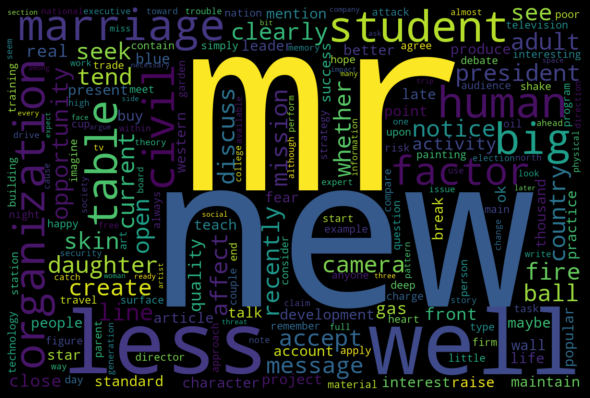

In [20]:
import matplotlib.pyplot as plt


fig = plt.figure(figsize=(8, 6), facecolor='k', edgecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


## Conclusion
And there we have it. **A simple, repeatable method for extracting word frequency from paragraph text for use in generating word clouds.**

It really only required about 5 lines of code to extract the data:

In [ ]:
word_list = []
for index, row in df.iterrows():
    words = row.text.lower().replace(".","").split(" ")
    word_list.extend(words)

df = pd.DataFrame({"word": word_list})

And only another 10 or so to actually create a word cloud visualization as well!